In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import time
ctime = time.time()
import data_bert
ctime = time.time() - ctime
print("data_bert loading:  ", ctime)

data_bert loading:   0.0


In [4]:
ctime = time.time()
import data_bert_tree_struct
ctime = time.time() - ctime
print("data_bert_tree_struct loading:  ", ctime)

data_bert_tree_struct loading:   186.49194407463074


# Check if partition structure is correct

In [3]:
for k in range(len(data_bert_tree_struct.topic_trees_contents)):
    groups = data_bert_tree_struct.topics_group[k]["groups"]
    groups_ids = data_bert_tree_struct.topics_group[k]["group_ids"]
    # check groups no repeat
    total_len = 0
    for subgroup in range(len(data_bert_tree_struct.topics_group[k]["groups"])):
        sginfo = data_bert_tree_struct.topics_group[k]["groups"][subgroup]
        assert len(np.unique(sginfo)) == len(sginfo)
        total_len += len(sginfo)
    
    # check mutually disjoint
    assert len(np.unique(np.concatenate([subgroup for subgroup in data_bert_tree_struct.topics_group[k]["groups"]]))) == total_len
    
    # check include all
    assert len(data_bert.topics.loc[data_bert.topics["level"] >= k]) == total_len

NameError: name 'data_bert_tree_struct' is not defined

In [11]:
for channel in range(len(data_bert_tree_struct.topics_group[0]["group_ids"])):
    channelid = data_bert_tree_struct.topics_group[0]["group_ids"][channel]
    channelstr = data_bert.topics.iloc[channelid]["channel"]
    group1 = set(data_bert.topics.index[data_bert_tree_struct.topics_group[0]["groups"][channel]])
    group2 = set(data.obtain_topics([channelstr]).index)
    assert len(group1.symmetric_difference(group2)) == 0

In [4]:
for k in range(len(data_bert_tree_struct.topics_group_filtered)):
    assert (data_bert_tree_struct.topics_group_filtered[k]["group_ids"][1:] <= data_bert_tree_struct.topics_group_filtered[k]["group_ids"][:-1]).sum() == 0

In [12]:
for level in range(len(data_bert_tree_struct.topics_group_filtered)):
    assert len(data_bert_tree_struct.topics_group_filtered[level]["groups"]) == len(data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"])
    for group_klevel in range(len(data_bert_tree_struct.topics_group_filtered[level]["groups"])):
        assert (~data_bert.fast_contains_multi(np.sort(data_bert_tree_struct.topics_group_filtered[level]["groups"][group_klevel]),
                                             data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"][group_klevel])).sum()==0
        if len(data_bert_tree_struct.topics_group_filtered[level]["groups"][group_klevel]) > len(data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"][group_klevel]):
            topic_num_id = data_bert_tree_struct.topics_group_filtered[level]["group_ids"][group_klevel]
            print(level, "  ", group_klevel, "  ", topic_num_id, "  ",
                 data_bert.topics["channel"].iloc[topic_num_id])

0    40    15974    9dd9a7
0    43    16665    217993
0    52    20109    c88ff6
0    53    20312    42e8ef
0    72    32928    4d2d4a
0    89    40250    255459
0    120    54383    bff3ab
0    125    55912    26f53a
0    135    61379    8260fc
1    79    8681    c88ff6
1    107    12385    217993
1    126    14940    c88ff6
1    132    15494    217993
1    173    20777    bff3ab
1    218    26092    42e8ef
1    227    27073    217993
1    245    29157    c88ff6
1    294    35454    26f53a
1    315    37816    26f53a
1    423    50482    26f53a
1    446    54457    c88ff6
1    479    58846    26f53a
1    492    60466    217993
1    494    60701    4d2d4a
1    507    61997    217993
1    550    67463    217993
1    560    68319    255459
1    573    69447    c88ff6
1    601    73072    4d2d4a
2    1    14    bff3ab
2    43    1196    217993
2    68    1940    217993
2    135    4730    c88ff6
2    181    6952    c88ff6
2    184    7016    26f53a
2    191    7121    c88ff6
2    216    8

In [13]:
data_bert.topics.iloc[44363]

title                           انگریزی
description                     انگریزی
channel                          217993
category                         source
level                                 3
language                             ur
parent                   t_af3ace5b6513
has_content                        True
description_translate               NaN
title_translate                     NaN
Name: t_94a472d16374, dtype: object

In [19]:
locs = ~data_bert.fast_contains_multi(data_bert_tree_struct.topics_group_filtered[0]["groups"][0],
                                             data_bert_tree_struct.topics_group_filtered[0]["group_filter_available"][0])
data_bert_tree_struct.topics_group_filtered[0]["group_filter_available"][0][locs]

array([14563,  7846, 24824, 58878, 63367, 74569,  3215,  5153,  5736,
       13389, 13870, 14833, 16611, 17550, 17622, 18002, 20184, 21159,
       23523, 26065, 27014, 27925, 28333, 29934, 32181, 32958, 33710,
       33926, 33954, 34174, 36297, 38301, 38538, 38762, 39350, 43961,
       44343, 46690, 49149, 53486, 56534, 56610, 56638, 57598, 58241,
       60958, 61998, 63807, 65200, 66498, 68759, 70314, 70446, 72554,
       73477, 75516,   262,   304,   312,   353,   356,   507,   726,
         785,   910,   956,  1679,  1681,  1862,  1873,  2013,  2204,
        2207,  2376,  2479,  2739,  2968,  3043,  3073,  3249,  3660,
        3682,  3715,  4123,  4206,  4344,  4364,  4421,  4449,  4575,
        5090,  5099,  5307, 21823, 21827, 22078, 22154, 22689, 22748,
       22817, 22997, 23090, 23102, 23439, 23604, 24004, 24022, 24116,
       24319, 24645, 24775, 24928, 24945, 25217, 25264, 25379, 25512,
       25646, 25711, 25785, 25829, 25883, 26450, 26482, 26562, 26599,
       26750, 26822,

# Check if partition contents are correct

In [8]:
for level in range(len(data_bert_tree_struct.topic_trees_filtered_contents)):
    klevel_ids = data_bert_tree_struct.topic_trees_filtered_contents[level]["topic_id_klevel"]
    assert (klevel_ids[1:] - klevel_ids[:-1] < 0).sum() == 0
    
    unique_ids = np.unique(klevel_ids)
    for unique_id in unique_ids:
        locs = klevel_ids == unique_id
        res_cids = data_bert_tree_struct.topic_trees_filtered_contents[level]["content_id"][locs]
        assert (res_cids[1:] - res_cids[:-1] < 0).sum() == 0
    
    k = level
    
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[k]["group_ids"][
        data_bert_tree_struct.topic_trees_filtered_contents_train[level]["topic_id_klevel"]]].unique()).difference(
        set(data_bert.channel_components[0]))) == 0
    
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[k]["group_ids"][
        data_bert_tree_struct.topic_trees_filtered_contents_test[level]["topic_id_klevel"]]].unique()).difference(
        set(data_bert.test_data_channels))) == 0
    
    assert (~data_bert.fast_contains_multi(data_bert_tree_struct.topics_group_filtered[level]["group_train_ids"],
                                           data_bert_tree_struct.topic_trees_filtered_contents_train[level]["topic_id_klevel"])).sum()==0
    assert (~data_bert.fast_contains_multi(data_bert_tree_struct.topics_group_filtered[level]["group_test_ids"],
                                           data_bert_tree_struct.topic_trees_filtered_contents_test[level]["topic_id_klevel"])).sum()==0
    assert (~data_bert.fast_contains_multi(data_bert.train_contents_num_id,
                                         data_bert_tree_struct.topic_trees_filtered_contents_train[level]["content_id"])).sum()==0
    assert (~data_bert.fast_contains_multi(data_bert.test_contents_num_id,
                                         data_bert_tree_struct.topic_trees_filtered_contents_test[level]["content_id"])).sum()==0


In [4]:
def randomly_check_filtered_contents():
    level = np.random.randint(8)
    levelk_id = np.random.randint(len(data_bert_tree_struct.topics_group_filtered[level]))
    
    subtree_topics = np.sort(data_bert_tree_struct.topics_group_filtered[level]["groups"][levelk_id])
    
    ct = data_bert_tree_struct.get_rep_indices(data_bert.has_correlation_topics, subtree_topics)
    contents = np.unique(data_bert.has_correlation_contents[ct])
    
    ct2 = data_bert_tree_struct.topic_trees_filtered_contents[level]["topic_id_klevel"] == levelk_id
    contents2 = data_bert_tree_struct.topic_trees_filtered_contents[level]["content_id"][ct2]
    
    assert len(contents) == len(contents2)
    assert (contents != contents2).sum() == 0
    
    if data_bert.fast_contains(data_bert.train_topics_num_id, data_bert_tree_struct.topics_group_filtered[level]["group_ids"][levelk_id]):
        ct3 = data_bert_tree_struct.topic_trees_filtered_contents_train[level]["topic_id_klevel"] == levelk_id
        contents3 = data_bert_tree_struct.topic_trees_filtered_contents_train[level]["content_id"][ct3]
        
        train_locs = data_bert.fast_contains_multi(data_bert.train_contents_num_id, contents2)
        assert len(contents2[train_locs]) == len(contents3)
        assert (contents2[train_locs] != contents3).sum() == 0
    elif data_bert.fast_contains(data_bert.test_topics_num_id, data_bert_tree_struct.topics_group_filtered[level]["group_ids"][levelk_id]):
        ct3 = data_bert_tree_struct.topic_trees_filtered_contents_test[level]["topic_id_klevel"] == levelk_id
        contents3 = data_bert_tree_struct.topic_trees_filtered_contents_test[level]["content_id"][ct3]
        
        test_locs = data_bert.fast_contains_multi(data_bert.test_contents_num_id, contents3)
        assert len(contents2[test_locs]) == len(contents3)
        assert (contents2[test_locs] != contents3).sum() == 0

def randomly_check_train_contents():
    level = np.random.randint(7)
    
    max_size = len(data_bert_tree_struct.topic_trees_filtered_contents_train[level]["content_id"])
    max_size2 = min(len(np.unique(data_bert_tree_struct.topic_trees_filtered_contents_train[level]["topic_id_klevel"])),
                    len(np.unique(data_bert_tree_struct.topic_trees_filtered_contents_train[level]["content_id"])))
    
    topics, contents, cor = data_bert_tree_struct.obtain_tree_train_sample(min(max_size, 1000), min(max_size, 1000), level)
    assert (data_bert_tree_struct.has_tree_correlations(contents, topics, level) != cor).sum() == 0
    
    assert (~data_bert.fast_contains_multi(data_bert.train_contents_num_id, contents)).sum() == 0
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[level]["group_ids"][
        topics]].unique()).difference(set(data_bert.channel_components[0]))) == 0
    
    topics, contents, cor = data_bert_tree_struct.obtain_tree_train_square_sample(min(max_size2, 300), level)
    assert (data_bert_tree_struct.has_tree_correlations(contents, topics, level) != cor).sum() == 0
    
    assert (~data_bert.fast_contains_multi(data_bert.train_contents_num_id, contents)).sum() == 0
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[level]["group_ids"][
        topics]].unique()).difference(set(data_bert.channel_components[0]))) == 0

def randomly_check_test_contents():
    level = np.random.randint(5)
    
    max_size = len(data_bert_tree_struct.topic_trees_filtered_contents_test[level]["content_id"])
    max_size2 = min(len(np.unique(data_bert_tree_struct.topic_trees_filtered_contents_test[level]["topic_id_klevel"])),
                    len(np.unique(data_bert_tree_struct.topic_trees_filtered_contents_test[level]["content_id"])))
    
    topics, contents, cor = data_bert_tree_struct.obtain_tree_test_sample(min(max_size, 1000), min(max_size, 1000), level)
    assert (data_bert_tree_struct.has_tree_correlations(contents, topics, level) != cor).sum() == 0
    
    assert (~data_bert.fast_contains_multi(data_bert.test_contents_num_id, contents)).sum() == 0
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[level]["group_ids"][
        topics]].unique()).difference(set(data_bert.test_data_channels))) == 0
    
    topics, contents, cor = data_bert_tree_struct.obtain_tree_test_square_sample(min(max_size2, 300), level)
    assert (data_bert_tree_struct.has_tree_correlations(contents, topics, level) != cor).sum() == 0
    
    assert (~data_bert.fast_contains_multi(data_bert.test_contents_num_id, contents)).sum() == 0
    assert len(set(data_bert.topics["channel"].iloc[data_bert_tree_struct.topics_group_filtered[level]["group_ids"][
        topics]].unique()).difference(set(data_bert.test_data_channels))) == 0
    
for k in range(100000):
    randomly_check_filtered_contents()
    randomly_check_train_contents()
    randomly_check_test_contents()
    if k % 25 == 0:
        print("Checked ",k)



Checked  0
Checked  25
Checked  50
Checked  75
Checked  100
Checked  125
Checked  150
Checked  175
Checked  200
Checked  225
Checked  250
Checked  275
Checked  300


KeyboardInterrupt: 

# Check if proximity map is correct

In [5]:
def obtain_2neighbors(node):
    total2nb = set([node.uid])
    if node.parent is not None:
        total2nb = total2nb.union(set([node.parent.uid]))
        if node.parent.parent is not None:
            total2nb = total2nb.union(set([node.parent.parent.uid]))
        total2nb = total2nb.union(set([sibling.uid for sibling in node.parent.children]))
    total2nb = total2nb.union(set([child.uid for child in node.children]))
    total2nb = total2nb.union(set([grandchild.uid for child in node.children for grandchild in child.children]))
    return total2nb

for nodeid in range(len(data_bert.topics)):
    nodestr = data_bert.topics.index[nodeid]
    node = data.topic_total_nodes[nodestr]
    nodeprox = data_bert_tree_struct.proximity_structure[nodeid]
    assert (node.parent is None) == (nodeprox["parent"] is None)
    if node.parent is not None:
        assert node.parent.uid == data_bert.topics.index[nodeprox["parent"]]
    assert len(set([child.uid for child in node.children])
        .symmetric_difference(set(data_bert.topics.index[nodeprox["children"]]))) == 0
    assert len(nodeprox["children"]) == len(set(nodeprox["children"]))
    assert len(obtain_2neighbors(node).symmetric_difference(set(data_bert.topics.index[nodeprox["close_prox"]]))) == 0
    assert len(nodeprox["close_prox"]) == len(set(nodeprox["close_prox"]))
    
    
# data_bert_tree_struct.proximity_structure

# Check if proximity correlations are correct

In [98]:
# Check train test split
assert (~data_bert.fast_contains_multi(data_bert.train_contents_num_id, data_bert_tree_struct.has_close_correlation_train_contents)).sum() == 0
assert (~data_bert.fast_contains_multi(data_bert.test_contents_num_id, data_bert_tree_struct.has_close_correlation_test_contents)).sum() == 0
assert (~data_bert.fast_contains_multi(data_bert.train_topics_num_id, data_bert_tree_struct.has_close_correlation_train_topics)).sum() == 0
assert (~data_bert.fast_contains_multi(data_bert.test_topics_num_id, data_bert_tree_struct.has_close_correlation_test_topics)).sum() == 0

In [107]:
def naive_has_correlation(content_num_id, topic_num_id):
    close_topics = data_bert_tree_struct.proximity_structure[topic_num_id]["close_prox"]
    hcorr = data_bert.has_correlations(np.array([content_num_id] * len(close_topics), dtype = np.int32), close_topics)
    return hcorr.sum() > 0

for k in range(len(data_bert_tree_struct.has_close_correlation_contents)):
    if k % 10000 == 0:
        print("Checked " + str(k) + " out of " + str(len(data_bert_tree_struct.has_close_correlation_contents)))
    assert naive_has_correlation(data_bert_tree_struct.has_close_correlation_contents[k], data_bert_tree_struct.has_close_correlation_topics[k])

Checked 0 out of 3312833
Checked 10000 out of 3312833
Checked 20000 out of 3312833
Checked 30000 out of 3312833
Checked 40000 out of 3312833
Checked 50000 out of 3312833
Checked 60000 out of 3312833
Checked 70000 out of 3312833
Checked 80000 out of 3312833
Checked 90000 out of 3312833
Checked 100000 out of 3312833
Checked 110000 out of 3312833
Checked 120000 out of 3312833
Checked 130000 out of 3312833
Checked 140000 out of 3312833
Checked 150000 out of 3312833
Checked 160000 out of 3312833
Checked 170000 out of 3312833
Checked 180000 out of 3312833
Checked 190000 out of 3312833
Checked 200000 out of 3312833
Checked 210000 out of 3312833
Checked 220000 out of 3312833
Checked 230000 out of 3312833
Checked 240000 out of 3312833
Checked 250000 out of 3312833
Checked 260000 out of 3312833
Checked 270000 out of 3312833
Checked 280000 out of 3312833
Checked 290000 out of 3312833
Checked 300000 out of 3312833
Checked 310000 out of 3312833
Checked 320000 out of 3312833
Checked 330000 out of 33

Checked 2680000 out of 3312833
Checked 2690000 out of 3312833
Checked 2700000 out of 3312833
Checked 2710000 out of 3312833
Checked 2720000 out of 3312833
Checked 2730000 out of 3312833
Checked 2740000 out of 3312833
Checked 2750000 out of 3312833
Checked 2760000 out of 3312833
Checked 2770000 out of 3312833
Checked 2780000 out of 3312833
Checked 2790000 out of 3312833
Checked 2800000 out of 3312833
Checked 2810000 out of 3312833
Checked 2820000 out of 3312833
Checked 2830000 out of 3312833
Checked 2840000 out of 3312833
Checked 2850000 out of 3312833
Checked 2860000 out of 3312833
Checked 2870000 out of 3312833
Checked 2880000 out of 3312833
Checked 2890000 out of 3312833
Checked 2900000 out of 3312833
Checked 2910000 out of 3312833
Checked 2920000 out of 3312833
Checked 2930000 out of 3312833
Checked 2940000 out of 3312833
Checked 2950000 out of 3312833
Checked 2960000 out of 3312833
Checked 2970000 out of 3312833
Checked 2980000 out of 3312833
Checked 2990000 out of 3312833
Checked 

In [118]:
import time
ctime = 0
for k in range(len(data_bert.topics)):
    close_prox = np.array(data_bert_tree_struct.proximity_structure[k]["close_prox"])
    hc_sort = np.sort(np.array(list(data_bert.topics_inv_map.loc[data_bert.correlations.index])))
    close_prox = close_prox[data_bert.fast_contains_multi(hc_sort, close_prox)]
    content_ids = list(data_bert.correlations.loc[data_bert.topics.index[close_prox], "content_ids"])
    content_ids = [ctid for content_id in content_ids for ctid in content_id.split()]
    content_num_ids = np.unique(np.array(list(data_bert.contents_inv_map.loc[content_ids])))
    assert (~data_bert_tree_struct.has_close_correlations(content_num_ids, np.repeat(k, len(content_num_ids)))).sum() == 0
    
    if k % 1000 == 0:
        print("Checked " + str(k) + " out of " + str(len(data_bert.topics)))
        ctime = time.time() - ctime
        print(ctime)
        ctime = time.time()

Checked 0 out of 76972
1676652595.767215
Checked 1000 out of 76972
23.729355812072754
Checked 2000 out of 76972
23.467053413391113
Checked 3000 out of 76972
24.38875460624695
Checked 4000 out of 76972
25.417957067489624
Checked 5000 out of 76972
24.98215365409851
Checked 6000 out of 76972
24.934101581573486
Checked 7000 out of 76972
25.571319818496704
Checked 8000 out of 76972
25.097553253173828
Checked 9000 out of 76972
28.615192890167236
Checked 10000 out of 76972
25.85480523109436
Checked 11000 out of 76972
26.13398241996765
Checked 12000 out of 76972
26.209988355636597
Checked 13000 out of 76972
25.910677194595337
Checked 14000 out of 76972
26.583041191101074
Checked 15000 out of 76972
25.198646545410156
Checked 16000 out of 76972
24.548478603363037
Checked 17000 out of 76972
26.44989252090454
Checked 18000 out of 76972
25.640844345092773
Checked 19000 out of 76972
25.655815362930298
Checked 20000 out of 76972
25.143484830856323
Checked 21000 out of 76972
26.683501482009888
Checked

# View group distribution statistics

In [36]:
groups = np.array([len(data_bert_tree_struct.topics_group_filtered[k]["group_ids"]) for k in range(len(data_bert_tree_struct.topics_group_filtered))])
pd.DataFrame(data = np.expand_dims(groups, axis = 0))

,0,1,2,3,4,5,6,7,8,9,10
0,169,641,2001,4090,1076,670,107,8,0,0,0


In [44]:
def plot_in_group_distribution(group):
    group_sizes = [len(data_bert_tree_struct.topics_group_filtered[group]["groups"][k]) for k in range(len(data_bert_tree_struct.topics_group_filtered[group]["groups"]))]
    group_sizes = np.array(group_sizes)
    g = sns.kdeplot(group_sizes)
    plt.axvline(np.mean(group_sizes), 0,1000000, color = "red")
    plt.axvline(np.median(group_sizes), 0,1000000, color = "green")
    # g.set(xlim=(0,30))
    plt.show()

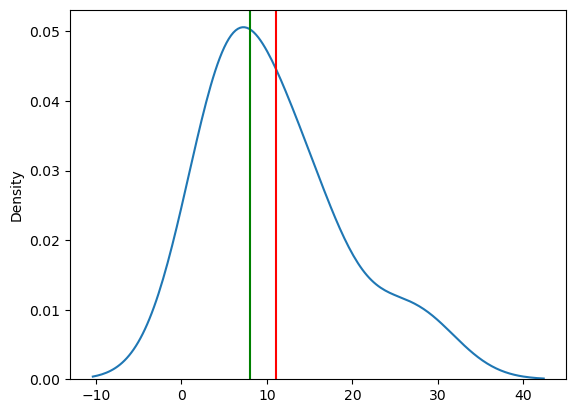

In [49]:
plot_in_group_distribution(7)

In [9]:
def plot_cors_distribution_train():
    group_sizes = [len(data_bert_tree_struct.topics_group_filtered[k]["group_train_ids"]) for k in range(len(data_bert_tree_struct.topic_trees_filtered_contents_train))]
    group_sizes = np.array(group_sizes)
    g = sns.barplot(x = np.arange(len(data_bert_tree_struct.topic_trees_filtered_contents_train)), y = group_sizes)
    # g.set(xlim=(0,30))
    plt.show()

def plot_cors_distribution_test():
    group_sizes = [len(data_bert_tree_struct.topics_group_filtered[k]["group_test_ids"]) for k in range(len(data_bert_tree_struct.topic_trees_filtered_contents_test))]
    group_sizes = np.array(group_sizes)
    g = sns.barplot(x = np.arange(len(data_bert_tree_struct.topic_trees_filtered_contents_test)), y = group_sizes)
    # g.set(xlim=(0,30))
    plt.show()

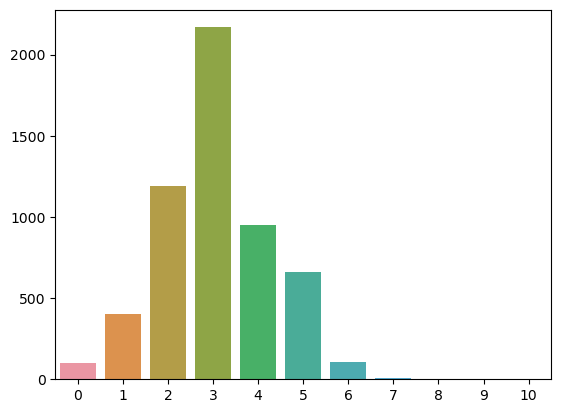

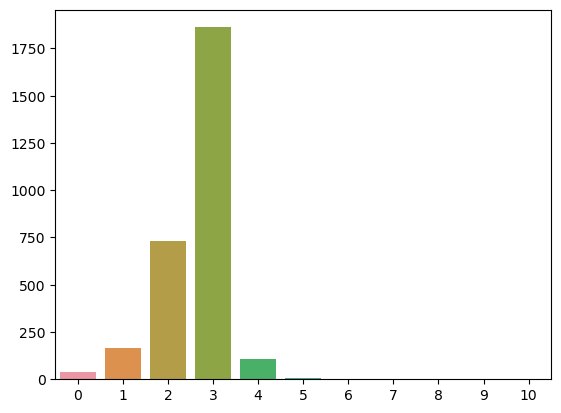

In [10]:
plot_cors_distribution_train()
plot_cors_distribution_test()

In [11]:
def obtain_median_group_size(level):
    return np.median([len(group) for group in data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"]])

def obtain_max_group_size(level):
    if len(data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"]) == 0:
        return 0
    return np.max([len(group) for group in data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"]])

def plot_median_sizes_distribution():
    group_sizes = [obtain_median_group_size(k) for k in range(len(data_bert_tree_struct.topics_group_filtered))]
    group_sizes = np.array(group_sizes)
    g = sns.barplot(x = np.arange(len(data_bert_tree_struct.topic_trees_filtered_contents_train)), y = group_sizes)
    plt.show()

def plot_max_sizes_distribution():
    group_sizes = [obtain_max_group_size(k) for k in range(len(data_bert_tree_struct.topics_group_filtered))]
    group_sizes = np.array(group_sizes)
    g = sns.barplot(x = np.arange(len(data_bert_tree_struct.topic_trees_filtered_contents_train)), y = group_sizes)
    plt.show()

def plot_sizes_distributions():
    for level in range(5):
        size_dist = np.array([len(group) for group in data_bert_tree_struct.topics_group_filtered[level]["group_filter_available"]])
        sns.kdeplot(size_dist).set_title("Group size distribution in level: " + str(level))
        plt.show()

C:\Users\Louis\PycharmProjects\KaggleLearningEqualityEnv\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Louis\PycharmProjects\KaggleLearningEqualityEnv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


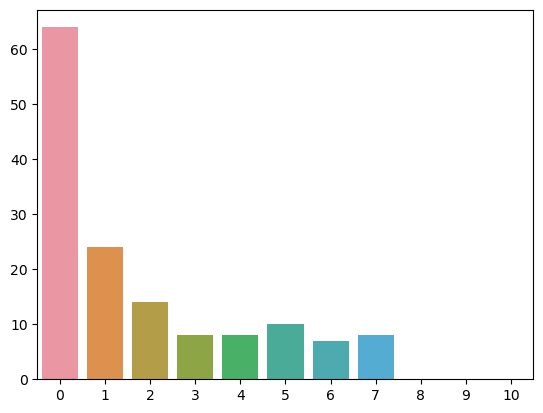

In [6]:
plot_median_sizes_distribution()

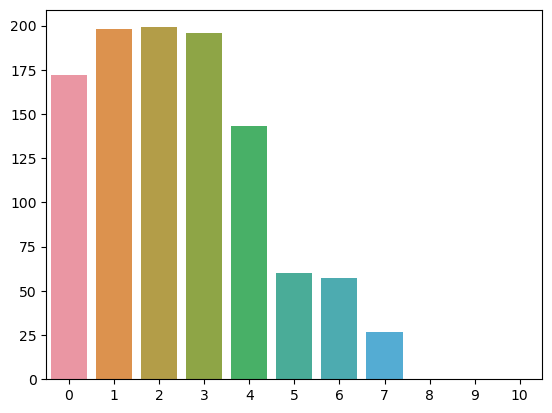

In [7]:
plot_max_sizes_distribution()

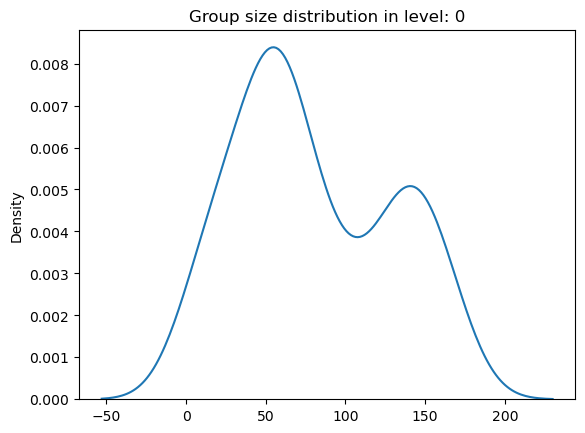

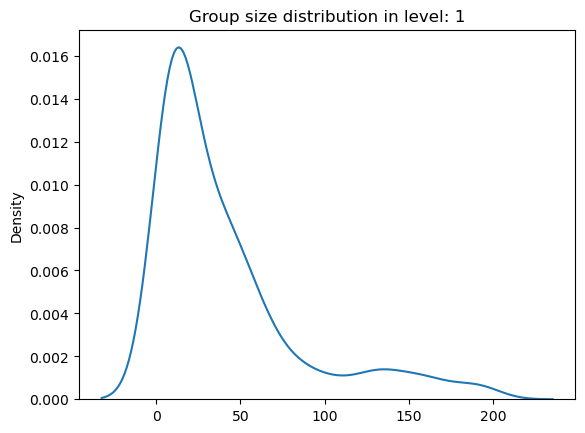

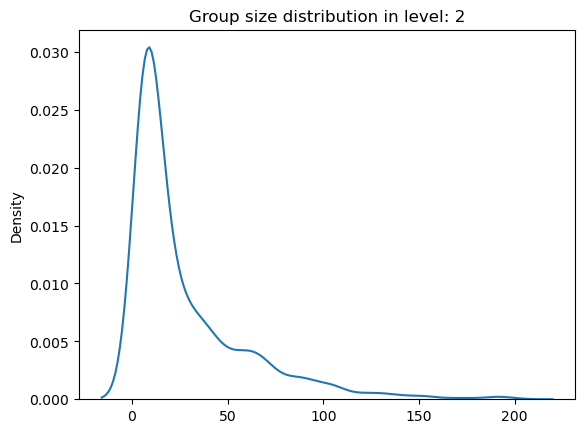

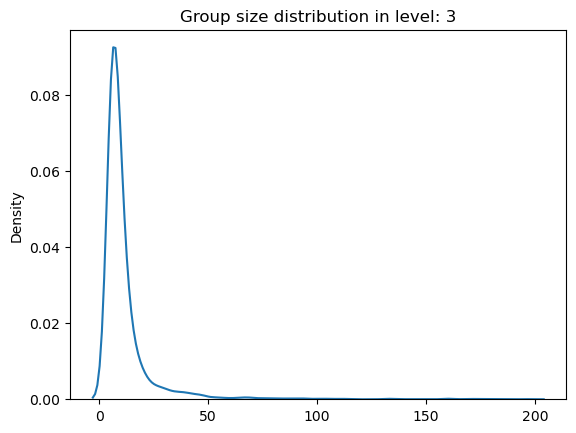

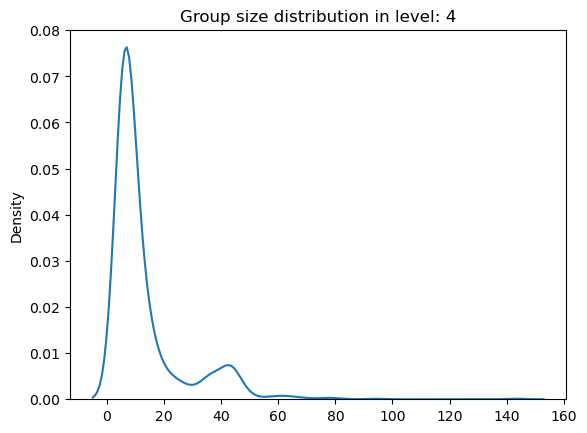

In [12]:
plot_sizes_distributions()